## Detecting UNIVERIATE OUTLIERS

In [17]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# URL of the Boston housing dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

# Define column names for the dataset
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the dataset into a pandas DataFrame
boston = pd.read_csv(url, delimiter=' ', skipinitialspace=True, header=None, names=columns)

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vizualizing Univeriate outliers

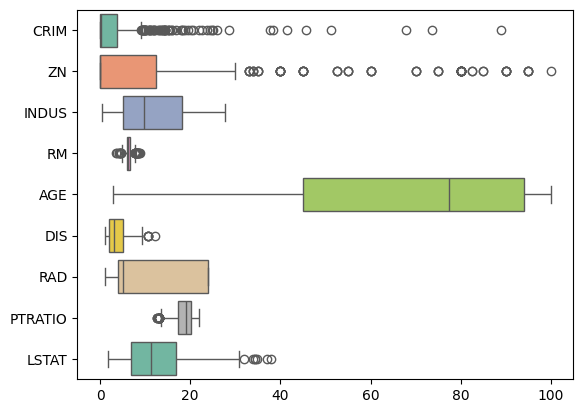

In [18]:
df = boston.copy()
#df.describe()

df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = df[['CHAS', 'NOX']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

Insights
* It appears there are three variables, precisely AGE, INDUS, and RAD, with no univariate outlier observations. * The remaining variables all have data points beyond their whiskers.


IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile

Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]

Outer fence = [Q1–3*IQR, Q3+3*IQR]

* # Following Tukey, only the probable outliers are treated, which lie outside the outer fence. 

In [19]:

#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")
print(probable_outliers_tm)
# [374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 
# 410 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]
print(possible_outliers_tm)
# [367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 
# 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 
# 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437,
# 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]

[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]
[367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]


Insights
* The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers.
* the statistics are easy to calculate.
*  this method does not require a normal distribution of the data, which is often not guaranteed in real-life settings
* # If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method.

[]
[380, 404, 405, 410, 414, 418]


C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_15060\3033410096.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CRIM_log'])


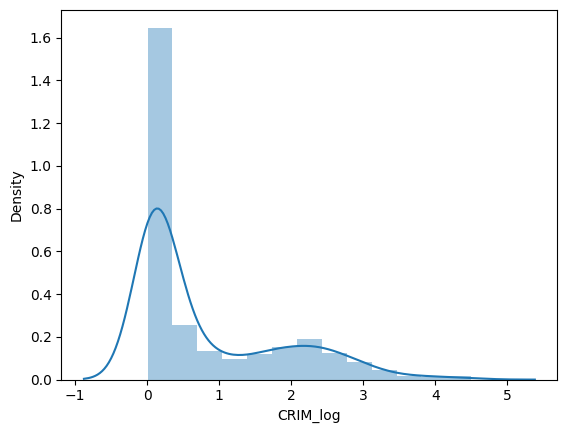

In [20]:
#Transform 'CRIM' to log 
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df, 'CRIM_log')
print(probable_outliers_logiq)
print(possible_outliers_logiq)

* # z-score method
* if z > C, where C is usually set to 3, the observation is marked as an outlier. 
* normally distributed -> 99.7% of all data points are located 3 standard deviations around the mean.

In [ ]:
#to be implemented

Insights
* method is highly limited as the distributions mean and standard deviation are sensitive to outliers.
* This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.
* the z-score method assumes the variable of interest to be normally distributed

* # MAD(Mean Absolute Deviation Method)
* # MAD = median(|xi-x̄)
* Compared to the internally (z-score) and externally studentized residuals, this method is more robust to outliers 
* does assume X to be parametrically distributed 

In [25]:

#MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(df, 'CRIM')
print(outlier_mad)
#[20, 31, 32, 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155,
# 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 310, 356, 357, 
# 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 
# 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 
# 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 
# 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 
# 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 
# 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 
# 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 
# 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]

AttributeError: module 'scipy.stats' has no attribute 'median_absolute_deviation'

Conclusion
* z-score needs to be applied critically due to its sensitivity to mean and standard deviation and its assumption of a normally distributed variable
* MAD method is often used instead and serves as a more robust alternative.
* Tukey’s box plot method offers robust results and can be easily extended when the data is highly skewed.
* To decide on the right approach for your own data set, closely examine your variables’ distribution,

## Detecting MULTIVERIATE OUTLIERS

Vizualization

* A common way to plot multivariate outliers is the scatter plot. 
* scatterplot visualizes the relationship between two (numerical) variables. 
* visualizing multivariate outliers across more than two variables is not feasible in a 2D space. 
* Therefore, we will stick to outliers found across two variables for visualization — so-called bi-variate outliers.

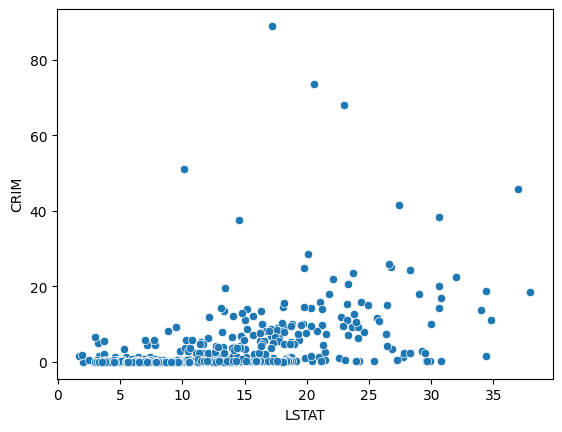

In [26]:
#Scatterpblot
ax = sns.scatterplot(x="LSTAT", y="CRIM", data=df)

Insights
* Like box plots, scatter plots visualize outlying observations very well but do not identify or mark them for easy treatment. 
* When dealing with multivariate outliers, distance metrics can be helpful for detection. 
* With distance metrics, the distance between two vectors is determined. These two vectors can be two different observations (rows) or an observation (row) compared to the mean vector (row of means of all columns). 
* Distance metrics can be calculated independent of the number of variables in the dataset (columns).

# Treat Outliers